# Postwork Sesión 4

#### Objetivo

- Investigar la dependencia o independecia de las variables aleatorias X y Y, el número de goles anotados por el equipo de casa y el número de goles anotados por el equipo visitante.

#### Requisitos

- R, RStudio
- Haber trabajado con el prework y el work

#### Desarrollo

Ahora investigarás la dependencia o independencia del número de goles anotados por el equipo de casa y el número de goles anotados por el equipo visitante mediante un procedimiento denominado bootstrap, revisa bibliografía en internet para que tengas nociones de este desarrollo. 

1. Ya hemos estimado las probabilidades conjuntas de que el equipo de casa anote X=x goles (x=0,1,... ,8), y el equipo visitante anote Y=y goles (y=0,1,... ,6), en un partido. Obtén una tabla de cocientes al dividir estas probabilidades conjuntas por el producto de las probabilidades marginales correspondientes.

2. Mediante un procedimiento de boostrap, obtén más cocientes similares a los obtenidos en la tabla del punto anterior. Esto para tener una idea de las distribuciones de la cual vienen los cocientes en la tabla anterior. Menciona en cuáles casos le parece razonable suponer que los cocientes de la tabla en el punto 1, son iguales a 1 (en tal caso tendríamos independencia de las variables aleatorias X y Y).

__Notas para los datos de soccer:__ https://www.football-data.co.uk/notes.txt

In [10]:
setwd("c:/Users/eherr/OneDrive/Documents/BEDU/ProgramacionYEstadisticaConR/Sesion2/Files/PostworkSesion2")
library(plyr)
library(tensor)
library(ggplot2)

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



In [11]:
data_partidos_18_21 <- read.csv("Partidos_18_21.csv")

In [40]:
probRatio <- function(md) {
    library(tensor)
    t1 <- prop.table(table(md$FTHG))
    t2 <- prop.table(table(md$FTAG))
    t3 <- prop.table(table(md$FTHG, md$FTAG))
    # 1- Crear una matriz con los productos de cada elemento del vector con la 
    #    probabilidad de los goles de casa "probabilidad_goles_casa" con cada uno de
    #    los elementos del vector que almacena la probabilidad de goles visitante 
    #   "probabilidad_goles_visitante"
    ext_prod <- as.data.frame(tensor::tensor(t1, t2))
    # 2- Obtener el inverso multiplicativo de cada elemento de la matriz anterior "prod"
    ext_prod_inv <- apply(ext_prod, c(1, 2), '^', -1)
    # 3- Obtener la matriz resultante del producto elemento a elemento de la matriz 
    #    anterior con la matriz de probabilidad de goles "matriz_prob_goles"
    res <- as.data.frame(ext_prod_inv * t3)
    # res <- rename(res, c(Gols_casa=Var1, Gols_vis=Var2, cociente=Freq))
    # Por alguna extraña razón, la línea anterior no funciona en jupyter.
    # pero sí lo hace en RStudio.
    return(res)
}

In [42]:
df_cociente <- probRatio(data_partidos_18_21)
head(df_cociente)

Var1,Var2,Freq
0,0,0.9547829
1,0,1.0060639
2,0,0.9351621
3,0,1.1327151
4,0,1.1371571
5,0,1.2922240


In [44]:
media_muestral <- mean(df_cociente$Freq)

In [48]:
bootstrap <- replicate(n=10000, sample(df_cociente$Freq, replace = TRUE))

In [49]:
medias <- apply(bootstrap, MARGIN = 2, FUN = mean)

In [50]:
desv_est <- sqrt(sum((medias - media_muestral) ** 2) / length(medias))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


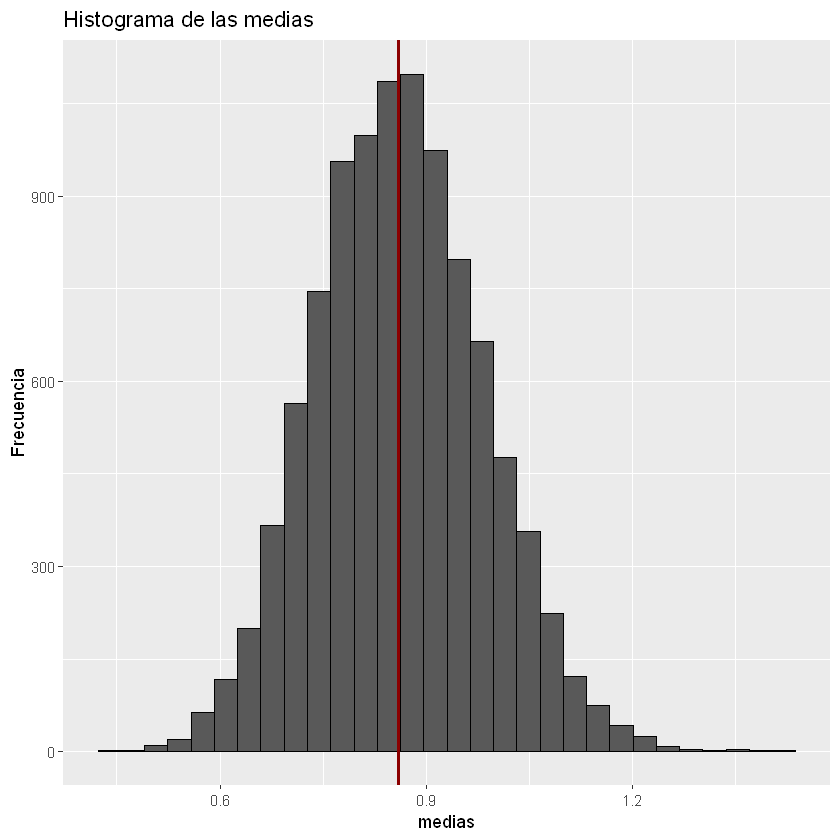

In [52]:
hist_bootstrap <- ggplot() + 
  geom_histogram(aes(x = medias), color="black") + 
  geom_vline(xintercept = media_muestral, size=1, color="darkred") +
  ylab("Frecuencia") +
  ggtitle("Histograma de las medias")
hist_bootstrap


In [53]:
t.test(medias)


	One Sample t-test

data:  medias
t = 708.29, df = 9999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.8592724 0.8640417
sample estimates:
mean of x 
 0.861657 
